# US-Accidents (2016 - 2021)

Use the "Run" button to execute the code.

# US Accidents Exploratory Data Analysis

TODO - Talk about EDA 

TODO- Talk about dataset (source ,what it contains,how it will be useful)
*  Kaggle 
*  Information about accidents
*  Can be useful to prevent accidents 

##Download the data


In [44]:
pip install opendatasets --upgrade --quiet

In [45]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [46]:
data_filename = '/content/us-accidents/US_Accidents_Dec21_updated.csv'

## Data Prepration and Cleaning

1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [47]:
import pandas as pd


In [48]:
df = pd.read_csv(data_filename)

In [49]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [51]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.count()

Severity             2845342
Start_Lat            2845342
Start_Lng            2845342
End_Lat              2845342
End_Lng              2845342
Distance(mi)         2845342
Number               1101431
Temperature(F)       2776068
Wind_Chill(F)        2375699
Humidity(%)          2772250
Pressure(in)         2786142
Visibility(mi)       2774796
Wind_Speed(mph)      2687398
Precipitation(in)    2295884
dtype: int64

Percentage of missing values per column


Text(0.5, 1.0, 'Percentage of missing values from each columns')

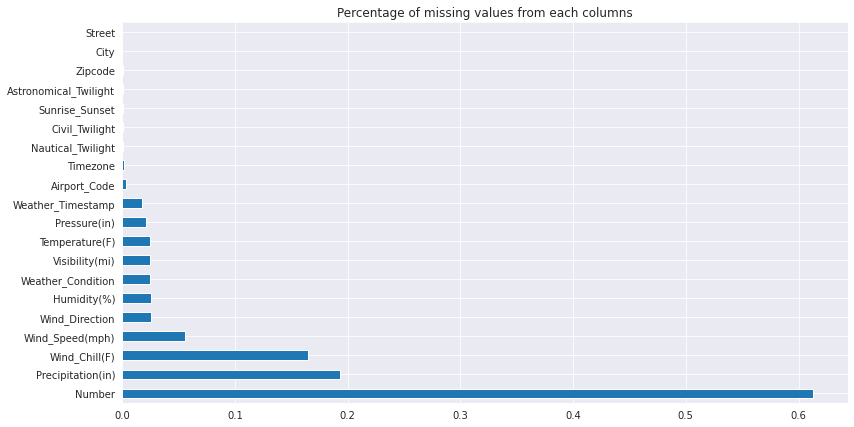

In [53]:
import matplotlib.pyplot as plt

missing_perc = df.isna().sum().sort_values(ascending=False)/len(df)

missing_perc[missing_perc != 0].plot(kind='barh',figsize=(13,7))
plt.title('Percentage of missing values from each columns')

Remove the columns that you dont want

##Exploratory Analysis and Visualiztion


Columns we'll analyze
1. City : Shows the city in address field.
2. Start time : Shows start time of the accident in local time zone.
3. Start Lat : Shows latitude in GPS coordinate of the start point.
4. Start Long : Shows longitude in GPS coordinate of the start point.
5. Temperature : Shows the temperature (in Fahrenheit). 
6. Weather condition 
7. Severity : Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay)
8. State: Shows the state in address field.

# Cities


In [54]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [55]:
cities = df.City.unique()
len(cities)

11682

In [56]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

Text(0.5, 1.0, 'Top 20 Cities with heighest no of accidents')

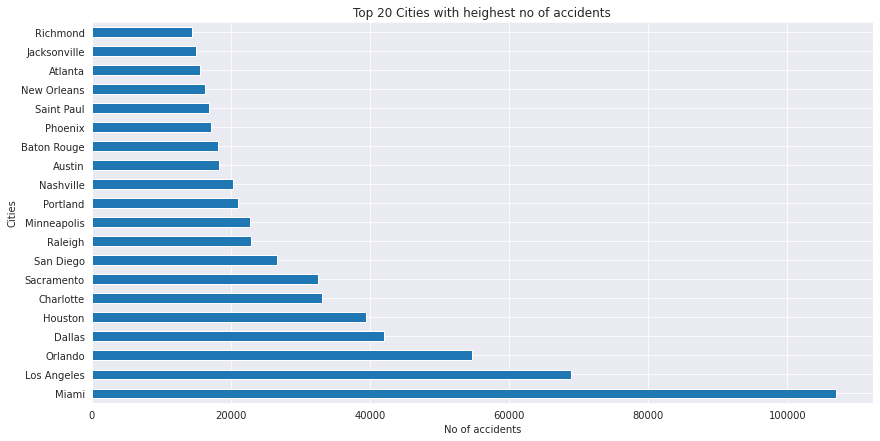

In [57]:
cities_by_accidents[:20].plot(kind='barh',figsize=(14,7))
plt.ylabel('Cities')
plt.xlabel('No of accidents')
plt.title('Top 20 Cities with heighest no of accidents')

In [58]:
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 10000.0)

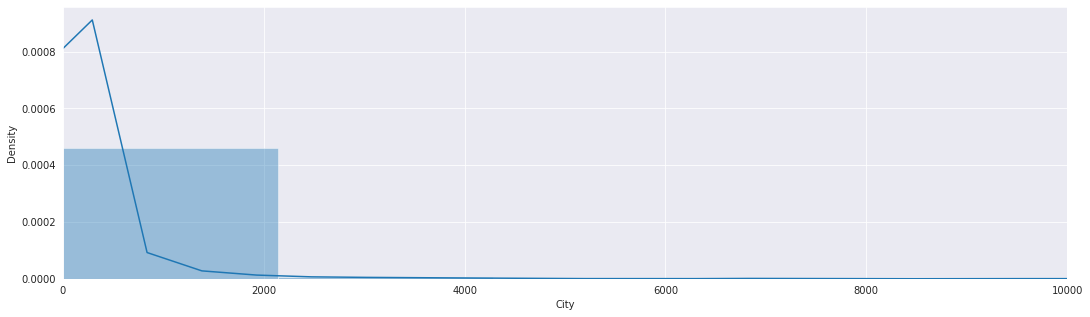

In [59]:
distribution = sns.distplot(cities_by_accidents,hist=True)
distribution.set_xlim(0, 10000)


In [60]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [61]:
len(high_accident_cities )/len(cities_by_accidents)

0.04246211796935194

In [62]:
len(low_accident_cities)/len(cities_by_accidents)

0.957537882030648

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


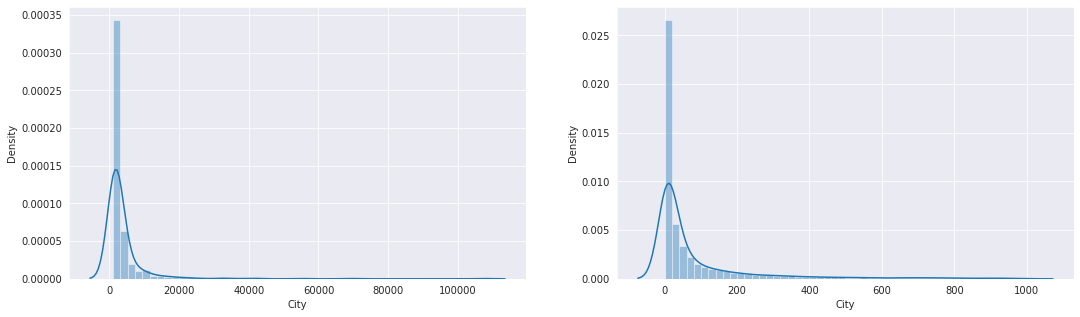

In [63]:
# plt.figure(figsize=(14,7))
plt.rcParams["figure.figsize"] = [18, 5]
f, axes = plt.subplots(1, 2)
sns.distplot(high_accident_cities,ax=axes[0])
sns.distplot(low_accident_cities,ax=axes[1])
plt.show()

In [64]:
'NY' in df.State

False

In [65]:
States = df.State.unique()
len(States)

49

**Top 10 Largest U.S. Cities by Population in 2022**

1. New York, New York – 8,467,513.
2. Los Angeles, California – 3,849,297.
3. Chicago, Illinois – 2,696,555.
4. Houston, Texas – 2,288,250.
5. Phoenix, Arizona – 1,624,569.
6. Philadelphia, Pennsylvania – 1,576,251.
7. San Antonio, Texas – 1,451,853.
8. San Diego, California – 1,381,611

## Start Time

In [66]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

##Ask and Answer questions

1. Are there more accident in warmer or colder areas?
2. Which states have heighest number of accidents? How about per capita?
3. Does new york show up in the data? If yes, why is the count lower if this the most populated city?
4. Accident and population relation?
5. Among the top 100 cities in number of accidents,which state do they belong to most frequently?

##Summary and Conclusion

**Insights**
1. New york data is missing 
2. This data have 49 out of 50 total states of USA.
3. Approximately 4.2 % cities have more than 1000 yearly accidents
4. Over 1200 cities have reported just one accident ( need to be investigated)